## Part B : *Hands-On Activity*

## Problem 1:

Add one more convolutional layer in the denoising autoencoder and run this model to denoise the noisy images in the test set.

In [2]:
try :
  # In Google Colab
  %tensorflow_version 2.x
except :
  pass

# Import Tensorflow
import tensorflow as tf

# Assure TensorFlow version >= 2 is installed. Otherwise install TensorFlow 2.0 version.
try :
  assert tf.__version__ >= "2.0"
  print ("TensorFlow version found:", tf.__version__)
except :
  !pip install tensorflow==2.4

# Import NumPy and Matplotlib.
import numpy as np
import matplotlib.pyplot as plt

TensorFlow version found: 2.8.0


In [20]:
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

# Scale and reshape the data.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5

x_train_noisy2 = x_train + noise_factor * (np.random.laplace(loc = 0.0, scale = 1.0, size = x_train.shape) + np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape))
x_test_noisy2 = x_test + noise_factor * (np.random.laplace(loc = 0.0, scale = 1.0, size = x_test.shape) + np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape))
x_train_noisy2 = np.clip(x_train_noisy2, 0., 1.)
x_test_noisy2 = np.clip(x_test_noisy2,0.,1)

In [21]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.keras.models import Model

input_img = Input(shape = (28, 28, 1))

x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Dropout(0.2)(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Dropout(0.2)(x)
encoded = Conv2D(32,(3, 3), activation = 'relu',padding = "same", )(x)


# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.2)(x)
decoded = Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = "accuracy")

autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                       

In [22]:
history = autoencoder.fit(x_train_noisy2, x_train,
                         epochs = 10,
                         batch_size = 16,
                         shuffle = True,
                         validation_data = (x_test_noisy2, x_test))

Epoch 1/10
3750/3750 [==============================] - 18s 5ms/step - loss: 0.1632 - accuracy: 0.8040 - val_loss: 0.1372 - val_accuracy: 0.8060
Epoch 2/10
3750/3750 [==============================] - 17s 4ms/step - loss: 0.1450 - accuracy: 0.8063 - val_loss: 0.1339 - val_accuracy: 0.8077
Epoch 3/10
3750/3750 [==============================] - 17s 5ms/step - loss: 0.1424 - accuracy: 0.8068 - val_loss: 0.1330 - val_accuracy: 0.8067
Epoch 4/10
3750/3750 [==============================] - 17s 5ms/step - loss: 0.1411 - accuracy: 0.8070 - val_loss: 0.1312 - val_accuracy: 0.8071
Epoch 5/10
3750/3750 [==============================] - 17s 5ms/step - loss: 0.1403 - accuracy: 0.8071 - val_loss: 0.1310 - val_accuracy: 0.8080
Epoch 6/10
3750/3750 [==============================] - 17s 5ms/step - loss: 0.1398 - accuracy: 0.8072 - val_loss: 0.1308 - val_accuracy: 0.8087
Epoch 7/10
3750/3750 [==============================] - 17s 4ms/step - loss: 0.1394 - accuracy: 0.8072 - val_loss: 0.1308 - val_ac

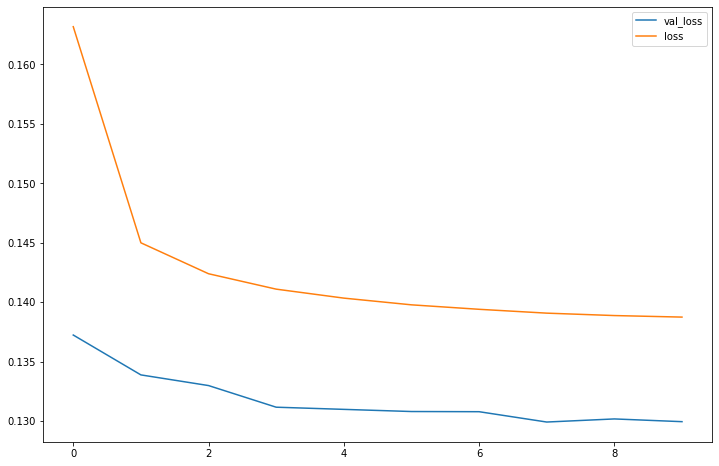

In [23]:
fig = plt.figure( figsize = (12,8) )

plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["loss"], label = "loss")
plt.legend()

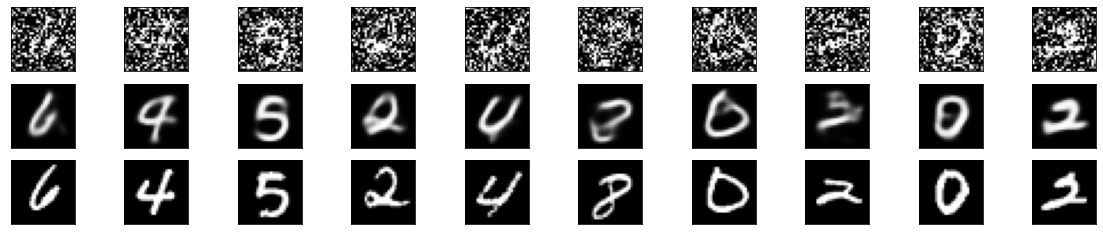

In [24]:
denoised_images = autoencoder.predict(x_test_noisy2)

# Visualize the reults.
import matplotlib.pyplot as plt

n = 10  # how many digits we will display

test_set_indices = np.random.randint(0, len(x_test_noisy2), size = n)
plt.figure( figsize = (20, 4) )

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy2[test_set_indices[i]].reshape(28, 28), cmap = "gray")
    #
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_images[test_set_indices[i]].reshape(28, 28), cmap = "gray")
    #
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[test_set_indices[i]].reshape(28, 28), cmap = "gray")
    #
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [25]:
gauss = x_test + noise_factor *np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)
laplace = x_test + noise_factor *np.random.laplace(loc = 0.0, scale = 1.0, size = x_test.shape)
bignoise = x_test + noise_factor *np.random.normal(loc = 0.0, scale = 5.0, size = x_test.shape)

gauss  = np.clip(gauss,  0., 1.)
laplace  = np.clip(laplace,  0., 1.)
bignoise  = np.clip(bignoise,  0., 1.)

print(autoencoder.evaluate(x_test_noisy2,x_test))
print(autoencoder.evaluate(gauss, x_test))
print(autoencoder.evaluate(laplace, x_test))
print(autoencoder.evaluate(bignoise, x_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.1299 - accuracy: 0.8076
[0.12994442880153656, 0.807578980922699]
313/313 [==============================] - 1s 3ms/step - loss: 0.1050 - accuracy: 0.8116
[0.10498929768800735, 0.8116179704666138]
313/313 [==============================] - 1s 3ms/step - loss: 0.1106 - accuracy: 0.8108
[0.11058461666107178, 0.8108386397361755]
313/313 [==============================] - 1s 3ms/step - loss: 0.2976 - accuracy: 0.7581
[0.29755640029907227, 0.7580938935279846]


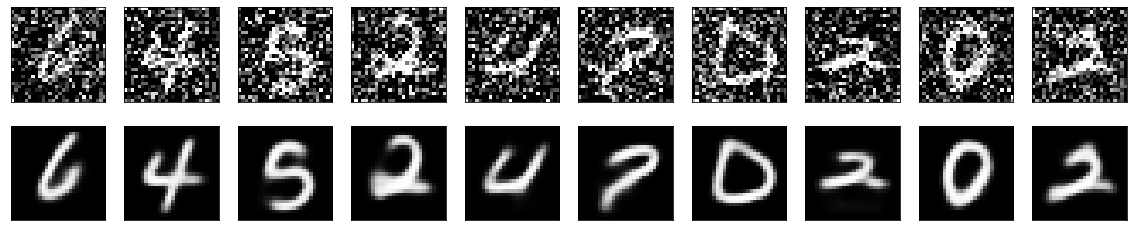

In [26]:
denoised_images = autoencoder.predict(gauss)
plt.figure( figsize = (20, 4) )
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(gauss[test_set_indices[i]].reshape(28, 28), cmap = "gray")
    #
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_images[test_set_indices[i]].reshape(28, 28), cmap = "gray")
    #
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

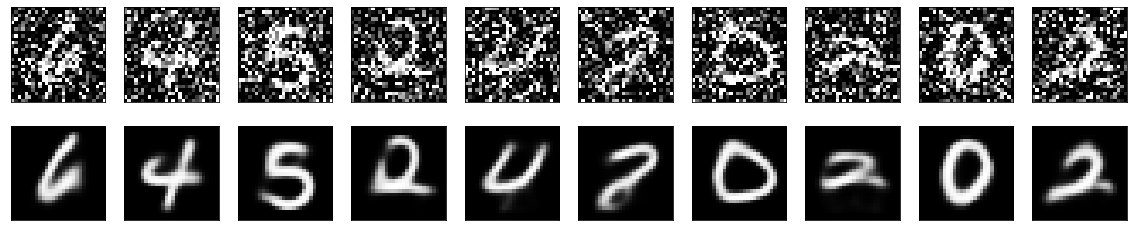

In [27]:
denoised_images = autoencoder.predict(laplace)
plt.figure( figsize = (20, 4) )
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(laplace[test_set_indices[i]].reshape(28, 28), cmap = "gray")
    #
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_images[test_set_indices[i]].reshape(28, 28), cmap = "gray")
    #
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

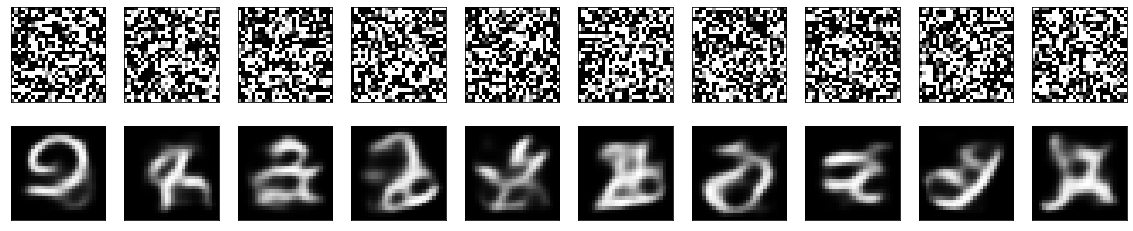

In [28]:
denoised_images = autoencoder.predict(bignoise)
plt.figure( figsize = (20, 4) )
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(bignoise[test_set_indices[i]].reshape(28, 28), cmap = "gray")
    #
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_images[test_set_indices[i]].reshape(28, 28), cmap = "gray")
    #
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#Comments

1. I tried introducing both gaussian and laplace noise, in addition to some drop out. It doesnt seem like dropout improved the performance of this model. 

2. The model can denoise both the combined noise, and the individual noises. 

3. If we look at the accuracy metric of the model when evaluated on the "bignoise" data set, we will see that it is comparable to the other ones, despite clearly worse results, as the noise is quite intense. This is probably because of the large amount of black pixels on the borders, which the model learn to predict as its a common feature of all the pictures. And so the high accuracy comes from the correct predictions on the border, and on the number. Therefore, the accuracy metric should probably not be used for this problem.

## Problem 2:

Create an image with an 11 by 11 pixels black box in the middle of it and mask all the images in the training and test set (i.e., create a black square hole in the middle of each image). Now train a convolutional autoencoder to reproduce the missing part of the images.

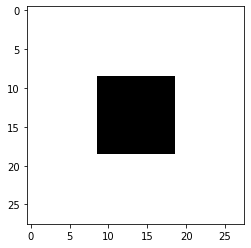

In [29]:

import numpy as np

box = np.zeros(shape=(10,10))
box = np.pad(box,9,'constant',constant_values=1)
box = np.array(box, dtype=bool)
plt.imshow(box)
plt.gray()

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

x_train = x_train/255.0
x_test = x_test/255.0

x_train_box = np.multiply(x_train[:,:,:,0],box)
x_test_box = np.multiply(x_test[:,:,:,0],box)

x_train_box = np.reshape(x_train_box, (len(x_train_box), 28, 28, 1)) 
x_test_box = np.reshape(x_test_box, (len(x_test_box), 28, 28, 1))

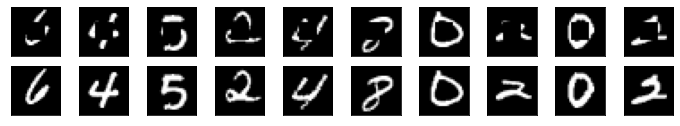

In [30]:
n = 10
plt.figure(figsize = (12, 2))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_box[test_set_indices[i]].reshape(28, 28), cmap = "gray")
    #
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test[test_set_indices[i]].reshape(28, 28), cmap = "gray")
    #
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [31]:
input_img = Input(shape = (28, 28, 1))

x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)

encoded = MaxPooling2D((2, 2), padding = 'same', name = "latent")(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 latent (MaxPooling2D)       (None, 7, 7, 32)          0         
                                                                 
 conv2d_26 (Conv2D)          (None, 7, 7, 32)          9248      
                                                           

In [32]:
history = autoencoder.fit(x_train_box, x_train,
                         epochs = 5,
                         batch_size = 16,
                         shuffle = True,
                         validation_data = (x_test_box, x_test))

Epoch 1/5
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0063 - val_loss: 0.0039
Epoch 2/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 3/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 4/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 5/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0036 - val_loss: 0.0036


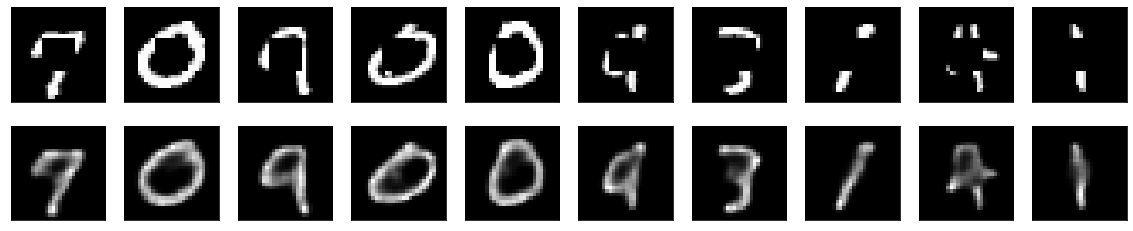

In [33]:
predicted_images = autoencoder.predict(x_test_box)
test_set_indices = np.random.randint(0, len(x_test_box), size = n)
plt.figure( figsize = (20, 4) )
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_box[test_set_indices[i]].reshape(28, 28), cmap = "gray")
    #
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_images[test_set_indices[i]].reshape(28, 28), cmap = "gray")
    #
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()